## Analyze Tweets

In [1]:
import pandas as pd 
import re 
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

### 2016-17 Season

In [2]:
# read data
filename = "2016_17 network tweets.csv"


df = pd.read_csv(filename)


In [3]:
df.head()

,username,replied_to_username,location,verified,created_at,text
0,athegreat584,NBA,,False,2016-10-31 23:59:50+00:00,@NBA \nRussell Westbrook is simply a machine; ...
1,rxjjy96,,,False,2016-10-31 23:56:44+00:00,If Russell Westbrook don't get MVP this season...
2,duvaljr,,,False,2016-10-31 23:55:25+00:00,Nothing about Russell Westbrook game changed. ...
3,prince_nueve,,,False,2016-10-31 23:53:09+00:00,Russell Westbrook and Damian Lillard are ballers
4,MontezzAllen313,,Chicago,False,2016-10-31 23:43:38+00:00,Will Russell Westbrook win MVP this season?


In [4]:
df.shape[0]

1927

In [5]:
tweets = df.text.tolist()
for t in tweets[:15]:
    print(t)

@NBA 
Russell Westbrook is simply a machine; Man on a mission ………how can you not love his competitive spirit?!?!
If Russell Westbrook don't get MVP this season imma cry
Nothing about Russell Westbrook game changed. He has been playing this for years. Bandwagon'rs!!!
Russell Westbrook and Damian Lillard are ballers
Will Russell Westbrook win MVP this season?
Russell Westbrook for MVP, homecoming king, president, and whatever else
After a historic start of the season for Russell Westbrook, was Kevin Durant the one holding him back this whole time?
@EmileFresne Yes cause Calling Russell Westbrook ass is something Emile would say 😂
Russell Westbrook = MVP ???
RIP to the Warriors, they ain't dead Russell Westbrook just finna destroy them on Thursday
I need to design a Russell Westbrook Revenge Tour t shirt
@jeffreyasante_ we will continue this argument when Russell Westbrook gets a "Ring"
Russell Westbrook has to be everyone's favorite player at this point.
The way Russell Westbrook been pl

In [6]:
# clean and stem words
def preprocess_text(text): 
    # get lowercase
    text = text.lower()
    # remove quotations
    text = text.replace("\"", "")
    text = text.replace("\'", "")
    text = text.replace("&", "")
    # remove urls
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
    # remove punctuation
    text = text.replace("_", " ")
    text = text.translate(text.maketrans('', '', string.punctuation))    
    # strip whitespace
    text = text.strip()
    # remove stop words
    stop_words = set(stopwords.words('english'))
#     new_stop_words = ['nba','team', 'game', 'season', 'player']
#     stop_words.extend(new_stop_words)
    tokens = word_tokenize(text)
    words = [w for w in tokens if not w in stop_words]
    text = " ".join(w for w in words)
    # stemming
    stemmer= PorterStemmer()
    tokens = word_tokenize(text)
    words = [stemmer.stem(w) for w in tokens]
    result = " ".join(w for w in words)
    return result

In [7]:
# put all tweets into a corpus
text_list = df.text.tolist()
corpus = " ".join(text_list)

# preprocess text
processed_text = preprocess_text(corpus)

In [8]:
print(processed_text)

nba russel westbrook simpli machin man mission ………how love competit spirit russel westbrook dont get mvp season imma cri noth russel westbrook game chang play year bandwagonr russel westbrook damian lillard baller russel westbrook win mvp season russel westbrook mvp homecom king presid whatev els histor start season russel westbrook kevin durant one hold back whole time emilefresn ye caus call russel westbrook ass someth emil would say 😂 russel westbrook mvp rip warrior aint dead russel westbrook finna destroy thursday need design russel westbrook reveng tour shirt jeffreyasant continu argument russel westbrook get ring russel westbrook everyon favorit player point way russel westbrook play season scari cant wait okc vs gsw russel westbrook million dollar fanduel yet russellwestbrook lebron jame russel westbrook name nba player week russel westbrook spirit anim nigga russel westbrook realli put myplay number russel westbrook mvp russel westbrook gon na averag tripl doubl season russel 

### Example WordCloud

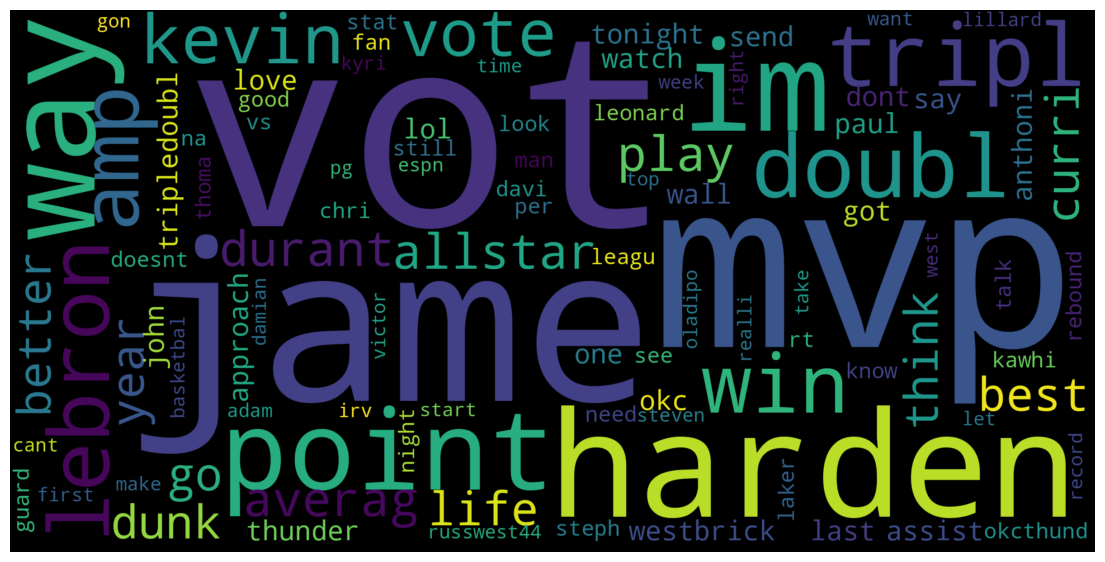

In [9]:
# remove query words from word cloud
wordcloud_text = processed_text.replace("russel", '')
wordcloud_text = wordcloud_text.replace("westbrook", '')
wordcloud_text = wordcloud_text.replace("nba", '')
wordcloud_text = wordcloud_text.replace("game", '')
wordcloud_text = wordcloud_text.replace("team", '')
wordcloud_text = wordcloud_text.replace("season", '')
wordcloud_text = wordcloud_text.replace("player", '')

wordcloud = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, 
                      scale = 6, collocations=False).generate(wordcloud_text)
plt.figure(figsize=(14, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Counts

In [10]:
from collections import Counter

# split text into words
words = wordcloud_text.split()
counter = Counter(words)

In [11]:
counter.most_common(15)

[('vot', 327),
 ('mvp', 239),
 ('jame', 211),
 ('harden', 160),
 ('way', 115),
 ('im', 114),
 ('point', 95),
 ('tripl', 94),
 ('doubl', 94),
 ('get', 89),
 ('like', 88),
 ('lebron', 86),
 ('amp', 79),
 ('win', 78),
 ('kevin', 76)]

### 2021-22 Season

In [16]:
# read data
filename_21 = "2021_22 network tweets.csv"


df_21 = pd.read_csv(filename_21)

In [17]:
# put all tweets into a corpus
text_list_21 = df_21.text.tolist()
corpus_21 = " ".join(text_list_21)

# preprocess text
processed_text_21 = preprocess_text(corpus_21)

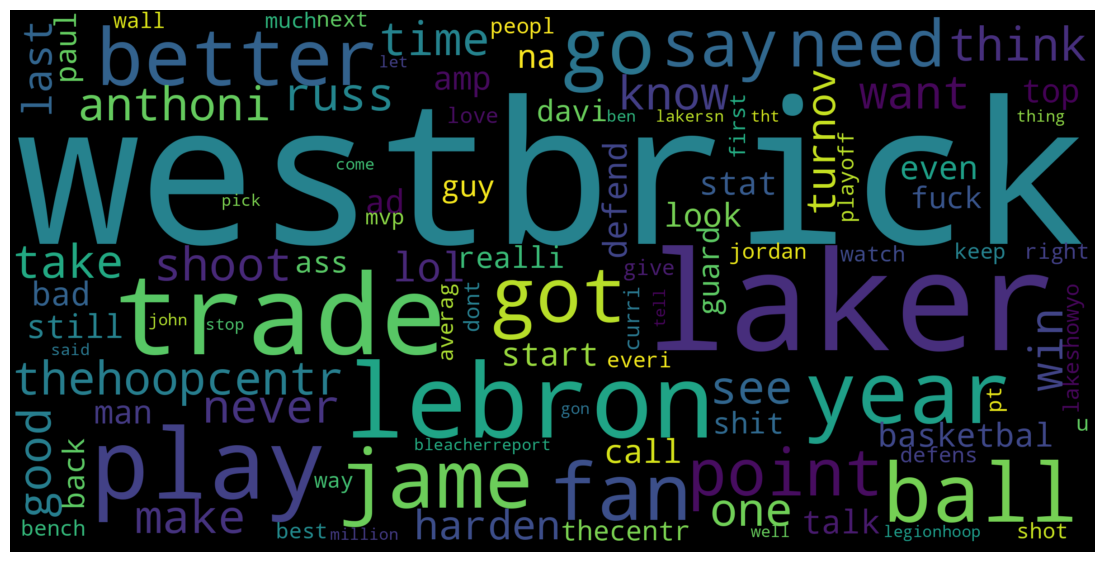

In [18]:
# remove query words from word cloud
wordcloud_text_21 = processed_text_21.replace("russel", '')
wordcloud_text_21 = wordcloud_text_21.replace("westbrook", '')
wordcloud_text_21 = wordcloud_text_21.replace("nba", '')
wordcloud_text_21 = wordcloud_text_21.replace("game", '')
wordcloud_text_21 = wordcloud_text_21.replace("team", '')
wordcloud_text_21 = wordcloud_text_21.replace("season", '')
wordcloud_text_21 = wordcloud_text_21.replace("player", '')

wordcloud_21 = WordCloud( max_font_size=100, max_words=100, width = 400, height = 200, 
                      scale = 6, collocations=False).generate(wordcloud_text_21)
plt.figure(figsize=(14, 20))
plt.imshow(wordcloud_21, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# split text into words
words = wordcloud_text_21.split()
counter = Counter(words)

counter.most_common(15)

[('westbrick', 761),
 ('’', 641),
 ('laker', 299),
 ('trade', 182),
 ('lebron', 161),
 ('like', 149),
 ('play', 148),
 ('get', 142),
 ('year', 110),
 ('jame', 100),
 ('ball', 99),
 ('would', 96),
 ('better', 92),
 ('go', 88),
 ('fan', 87)]